# 8章　Tree-Based Methods

R 3.6.0を使用しています。

In [1]:
# Data and Libraries
rm( list = ls( envir = globalenv() ), envir = globalenv() )
library(ISLR)
library(tree)
attach(Carseats)
High = ifelse(Sales <= 8, "No", "Yes") # np.whereのような三項演算子
Carseats = data.frame(Carseats, High)

## 1. The Basics of Decision Trees

### 1. Regression Trees（回帰木）

regression treesの構築方法は，大まかに次の2ステップである。

1. 説明変数$X_1, X_2, \dots, X_p$を，重複がないように$J$個の領域$R_1, R_2, \dots, R_J$に切り分ける。
2. すべての$R_j$について，観測が$R_j$に属する場合は，$R_j$に属する訓練データの平均値を予測値として返す。

$R_j$は，RSS（残差二乗和）が最小になるようにする。($R_j$の領域については図8.3参照)
$$
\sum_{j=1}^J\sum_{i\in R_j}(y_i - \hat{y}_{R_j})^2, \tag{8.1}
$$
ここで，$\hat{y}_{R_j}$は，$R_j$に属する訓練データの平均値（すなわち，決定木による予測値）である。

具体的には，
$$
R_1(j, s) = \{ X|X_j < s \} \ and \ R_2(j, s) = \{ X|X_j \geq s \}, \tag{8.2}
$$
となるsを見つけるということ，つまり，
$$
\sum_{i: x_i \in R_1(j, s)}(y_i - \hat{y}_{R_1})^2 + \sum_{i: x_i \in R_2(j, s)}(y_i - \hat{y}_{R_2})^2, \tag{8.3}
$$
を最小化させるjとsの値を見つければよい。

![ Figure 8.3 ](./fig8.3.png "Figure 8.3")

### Tree Pruning（決定木の剪定）

上記の方法では結果が複雑になりすぎるので，バイアスを少し大きくする代わりに，分散が小さく，解釈しやすい小さい木にしたい。  
そこで，Cost complexity pruningまたはweakest link pruningと呼ばれる，木の剪定アルゴリズムがある。
$$
\sum_{m=1}^{|T|} \sum_{x_i \in R_m} (y_i - \hat{y}_{R_m})2 + \alpha |T| \ tag{8.4}
$$
ここで，$T \subset T_0$で，$\alpha \geq 0$である。また，$|T|$は$T$の終端ノードの個数である。この（8.4）式をなるべく小さくすればよい。

さらに，木の剪定アルゴリズムの手順は次の通りである。

1. 各終端ノードの中の観測データの個数が一定数以下になるまで領域に分割する。
2. $\alpha$の関数として，cost complexity pruningを適用する。
3. $\alpha$を選ぶために，K-fold validationを使う。$1 \sim K$の$K$それぞれに対し，  
    (a)ステップ1と2を，k番目のトレーニングデータ以外に適用する。  
    (b)$\alpha$の関数として，k番目のデータの二乗平均予測誤差を求める。  
    $\alpha$の平均をとり，平均誤差を最小化させる$\alpha$を選択する。
4. 選んだ$\alpha$をステップ2の関数に代入し，部分木を返す。

### 2. Classification Trees（分類木）

Regression Treesでは残差二乗和（RSS）を使っていた。一方で，Classfication Treesではそれに対応する概念として，classification error rate（$E$）(ノードにおける誤り率)が存在する。
$$
E = 1 - \max_k(\hat{p}_{mk}) \tag{8.5}
$$
ここで，$\hat{p}_{mk}$は$R_m$に含まれる観測におけるクラス$k$の比率である。  
しかし，この関数は木の成長に対して十分敏感ではないことがわかり，実際には下の2つの関数が利用される。

Gini index（ジニ係数）
$$
G = \sum_{k=1}^K \hat{p}_{mk}(1 - \hat{p}_{mk}) \tag{8.6}
$$
これは，K個のクラスの総分散を示している。$\hat{p}_{mk}$が0または1に近づくと，ジニ係数は非常に小さくなるので，ノードの不純度を示すために使用される。ジニ係数が小さければ，領域内でのクラスのばらつきが少ないということである。

ジニ係数の代わりとして，交差エントロピーまたは逸脱度と呼ばれる関数がある。
$$
D = - \sum_{k=1}^K \hat{p}_{mk} log\hat{p}_{mk} \tag{8.7}
$$
$0 \leq \hat{p}_{mk} \leq 1$なので，$0 \leq \hat{p}_{mk}$であり，m番目のノードが綺麗であれば，小さな値をとる。  
実際に，ジニ係数と数値的によく似ている。

分類木を構築する際，典型的にジニ係数か交差エントロピーが分岐の質を評価するために使用される。

### 3. Trees Versus Linear Models

線形回帰は次のような形をとる。
$$
f(X) = \beta_0 + \sum_{j=1}^p X_j \beta_j, \tag{8.8}
$$
一方，回帰木は次のような形をとる。
$$
f(X) = \sum_{m=1}^M c_m \cdot 1_{(x \in R_m)} \tag{8.9}
$$

データが線形なら線形回帰，そうでなければ決定木…という感じだが，目的に合わせることが大事である。

### 4. Advantages and Disadvantages of Trees

決定木の長所
 - 人への説明が非常にしやすい。実際に線形回帰よりも説明が楽！
 - 人の決定に近いと信じる人もいる
 - 可視化が簡単なので，専門家でなくても容易に解釈できる
 - 質的データをダミー変数無しで容易に扱える
 
決定木の短所
 - 他の回帰や分類の手法に比べて，予測精度が悪い 
 - データが少し変化しただけで，結果が大きく変わってしまう。
 
しかし，バギング，ランダムフォレスト，ブースティングといった手法を用いれば精度は上がる。

In [2]:
# Fitting Classification Trees
tree.carseats = tree(High~.-Sales, Carseats)
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

summary関数で表示される"Misclassification error rate"は，次の式から算出される。
$$
-2\sum_m \sum_k n_{mk} log \hat{p}_{mk}
$$
ここで，$$はk番目のクラスに属するm番目の観測の数である。

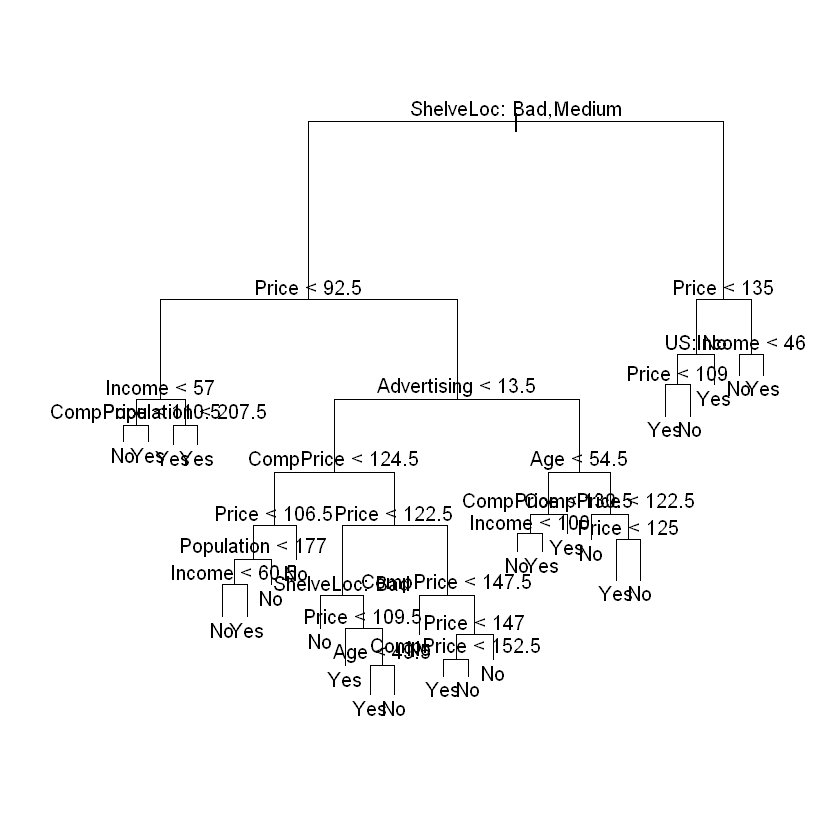

In [3]:
plot(tree.carseats)
text(tree.carseats, pretty=0) # pretty=0を付け加えるとShelveLocのBadなども表示してくれる

In [4]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

In [5]:
set.seed(2)
train = sample(1:nrow(Carseats), 200) # （擬似）無作為要素
Carseats.test = Carseats[-train, ]
High.test = High[-train]
tree.carseats = tree(High~.-Sales, Carseats, subset=train)
tree.pred = predict(tree.carseats, Carseats.test, type="class")
table(tree.pred, High.test) # ここでテキストと違う値が出てくる。バージョンによる乱数種が違う？

         High.test
tree.pred  No Yes
      No  104  33
      Yes  13  50

In [6]:
set.seed(3)
cv.carseats = cv.tree(tree.carseats, FUN=prune.misclass)
names(cv.carseats)
cv.carseats

[1] "size"   "dev"    "k"      "method"

$size
[1] 21 19 14  9  8  5  3  2  1

$dev
[1] 74 76 81 81 75 77 78 85 81

$k
[1] -Inf  0.0  1.0  1.4  2.0  3.0  4.0  9.0 18.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

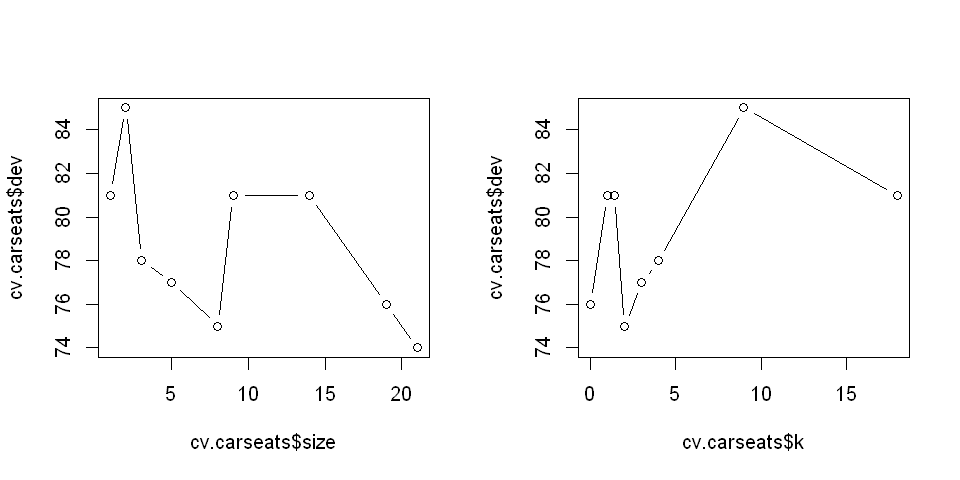

In [7]:
par(mfrow=c(1, 2))
options(repr.plot.width=8, repr.plot.height=4) # jupyter用
plot(cv.carseats$size, cv.carseats$dev, type="b")
plot(cv.carseats$k, cv.carseats$dev, type="b")

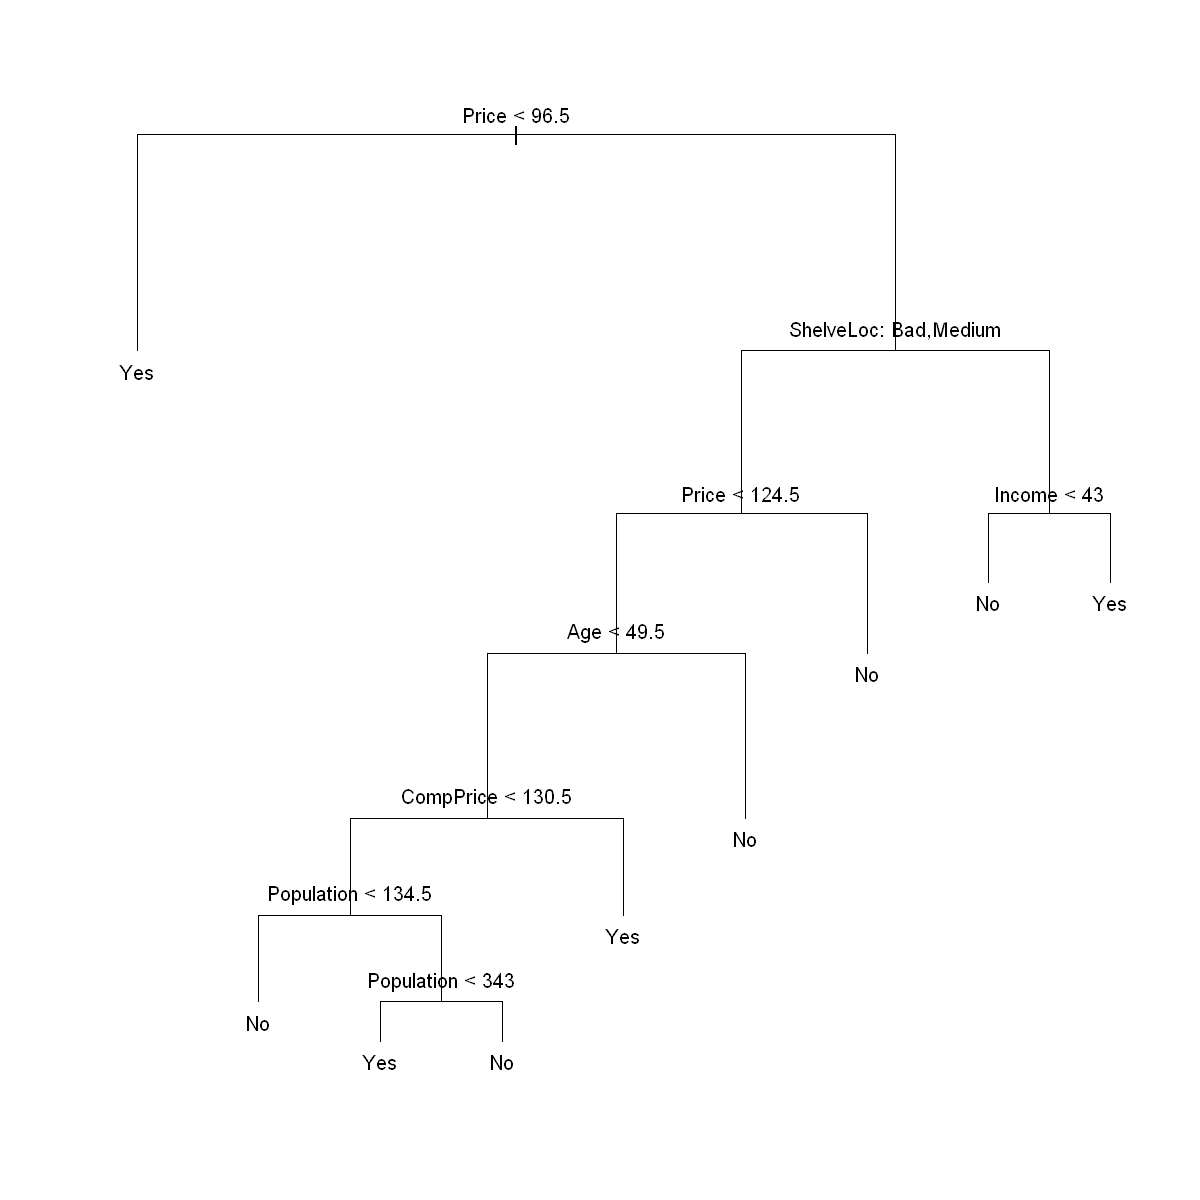

In [8]:
prune.carseats = prune.misclass(tree.carseats, best=9) # 終端ノードを9つに絞る
options(repr.plot.width=10, repr.plot.height=10) # jupyter用
plot(prune.carseats)
text(prune.carseats, pretty=0)

In [9]:
tree.pred = predict(prune.carseats, Carseats.test, type="class")
table(tree.pred, High.test)

         High.test
tree.pred No Yes
      No  97  25
      Yes 20  58

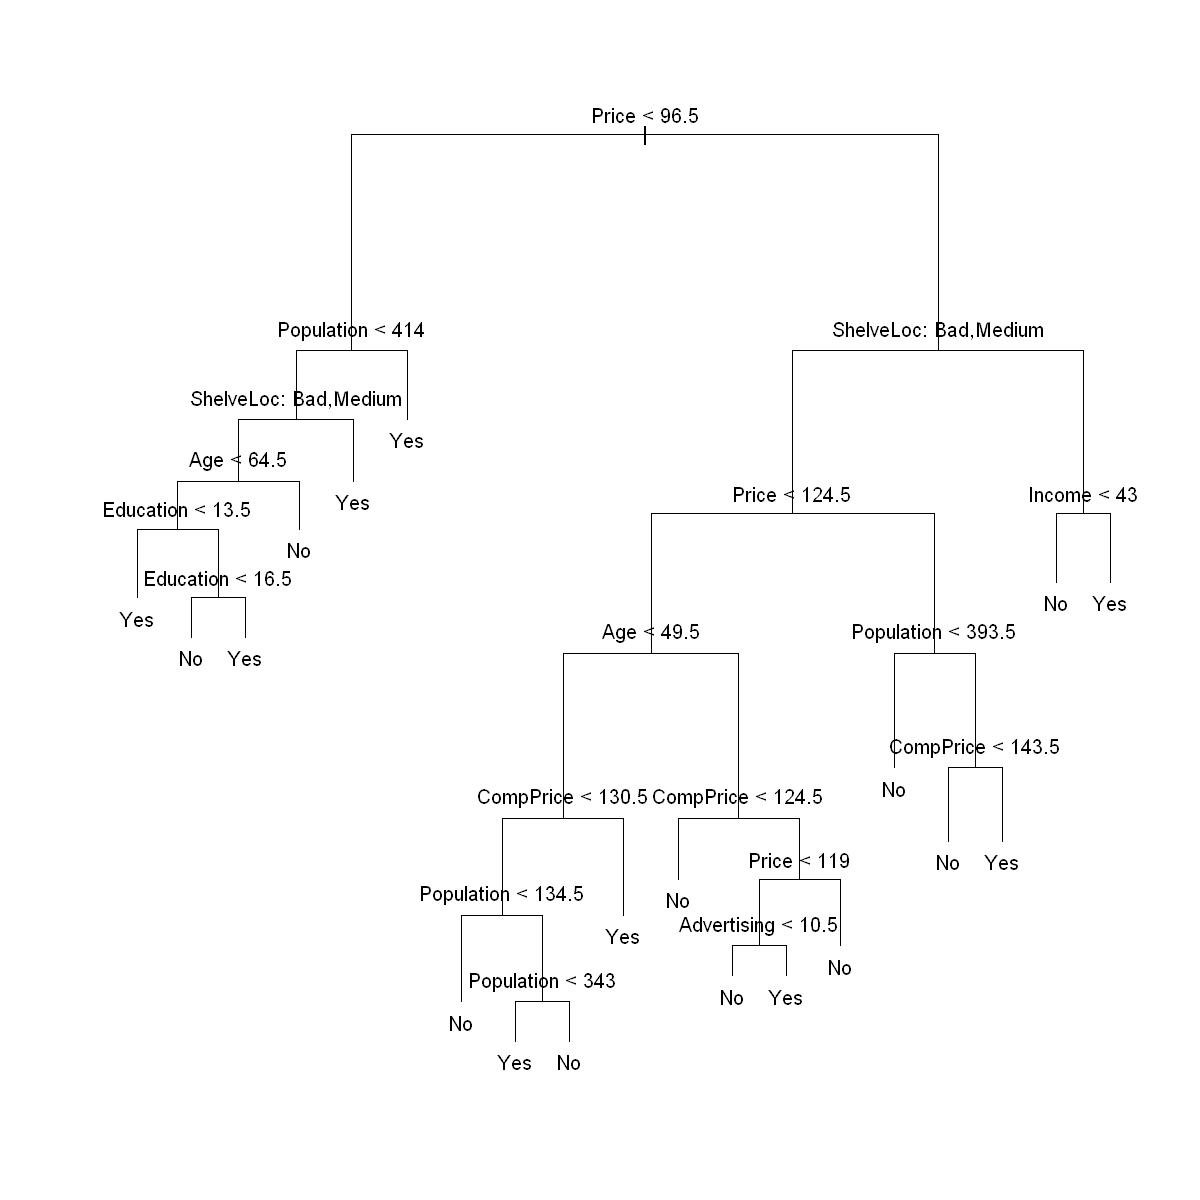

In [10]:
prune.carseats = prune.misclass(tree.carseats, best=15) # 終端ノードを15個に絞る
options(repr.plot.width=10, repr.plot.height=10) # jupyter用
plot(prune.carseats)
text(prune.carseats, pretty=0)

In [11]:
tree.pred = predict(prune.carseats, Carseats.test, type="class")
table(tree.pred, High.test)

         High.test
tree.pred  No Yes
      No  102  30
      Yes  15  53

## 2. Bagging, Random Forests, Boosting

### 1. Bagging

決定木は分散が大きいが，Bootstrapを応用したBaggingによって統計的な学習手法の分散を小さくする。

例えば，n個の独立した観測$Z_1, \dots, Z_n$のそれぞれの分散を$\sigma$とする。分散の平均を$\bar{Z}$とすると，$\bar{Z} = \sigma^2 / n$となる。一連の観測の平均をとることにより，分散を小さくすることができるのである。よって，母集団からたくさんの訓練データを使用して，それぞれ別々の予測モデルを構築し，予測結果の平均をとればよい。

バギングは，bootstrapでたくさんのデータセットを生成する。　　
分散を小さくするために，$\hat{f}^1(x), \hat{f}^2(x), \dots, \hat{f}^b(x)$を求めて平均する。
$$
\hat{f}^{avg}(x) = \frac{1}{B}\sum_{b=1}^{B}\hat{f}^b(x)
$$
一般的に複数の訓練セットを利用する必要はないので，これでは実用的ではない。その代わり，同じ訓練セットから何度もサンプルを入手する。そのため，bootstrapで入手したデータより$\hat{f}^{*b}(x)$を作成する。つまり，
$$
\hat{f}^{bag}(x) = \frac{1}{B}\sum_{b=1}^{B}\hat{f}^{*b}(x)
$$
これがバギングである。

バギングは他の手法でも利用できるが，分散が大きくバイアスが小さい決定木の分散を小さくするので，決定木に特に有効である。また，分類問題に対しては，B個の決定木の結果で最も多かった結果を採用すればよい。

**参考文献**  
kfumix, [ ISLR: Chapter 8 Tree-Based Methods ](http://kfumix.hatenablog.com/entry/2017/06/25/212754) (2019/6/4)